<a href="https://colab.research.google.com/github/FrozenFalcon-Byte/Natural-Scenes-Classification/blob/main/Natural_Scenes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d utkarshsaxenadn/landscape-recognition-image-dataset-12k-images

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/landscape-recognition-image-dataset-12k-images
License(s): CC0-1.0
 93% 462M/496M [00:01<00:00, 378MB/s]
100% 496M/496M [00:01<00:00, 457MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/landscape-recognition-image-dataset-12k-images.zip', 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    rotation_range=30,
    zoom_range = 0.2,
    # horizontal_flip = True,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(rescale = (1./255))


In [41]:
train_set = train_datagen.flow_from_directory(
    '/content/dataset/Landscape Classification/Landscape Classification/Training Data',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_set = validation_datagen.flow_from_directory(
    '/content/dataset/Landscape Classification/Landscape Classification/Validation Data',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 10000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 146, 146, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,305,509 (16.42 MB)

 Trainable params: 4,305,509 (16.42 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_set, epochs=10, validation_data=validation_set)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.5445 - loss: 1.1347 - val_accuracy: 0.6553 - val_loss: 0.8800
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.6764 - loss: 0.8660 - val_accuracy: 0.6780 - val_loss: 0.8980
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7086 - loss: 0.8066 - val_accuracy: 0.6587 - val_loss: 0.8878
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7279 - loss: 0.7529 - val_accuracy: 0.6853 - val_loss: 0.8318
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.7618 - loss: 0.6716 - val_accuracy: 0.6987 - val_loss: 0.8169
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7654 - loss: 0.6345 - val_accuracy: 0.7013 - val_loss: 0.8428
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7940 - loss: 0.5642 - val_accuracy: 0.6760 - val_loss: 0.8857
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8242 - loss: 0.4837 - 

In [22]:
import matplotlib.pyplot as plt


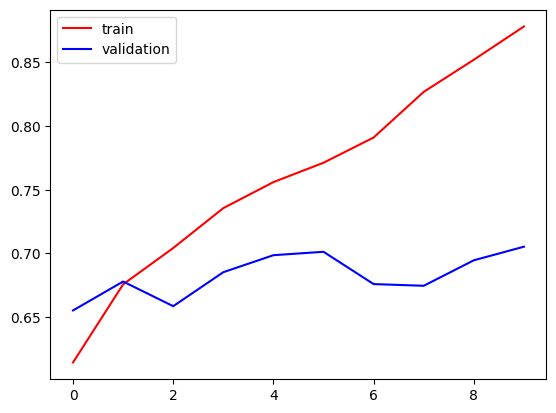

In [23]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

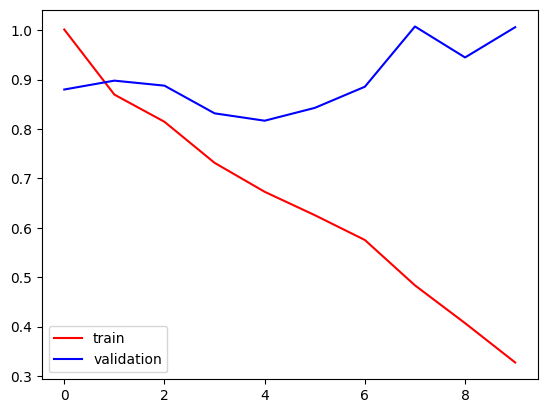

In [25]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

### IMPROVING MODEL PERFORMANCE
improved the model and reduced overfitting by:
1. adding BatchNormalization layer
2. adding l2 regularizaation to the convolution layers
3. adding one more set of convolution, BatchNormalization and MaxPooling layer
4. increased the ddorpout to (0.4)
5. reduced the learning rate to 0.0001

In [33]:
from keras.regularizers import l2

In [70]:
model = Sequential()

In [71]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 146, 146, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 146, 146, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 71, 71, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 33, 33, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,014,053 (7.68 MB)

 Trainable params: 2,013,029 (7.68 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [73]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(train_set, epochs=10, validation_data=validation_set)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 247ms/step - accuracy: 0.5278 - loss: 4.5862 - val_accuracy: 0.2107 - val_loss: 5.6002
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 214ms/step - accuracy: 0.6697 - loss: 3.9597 - val_accuracy: 0.6493 - val_loss: 3.7454
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.6756 - loss: 3.6275 - val_accuracy: 0.6693 - val_loss: 3.4535
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 209ms/step - accuracy: 0.7031 - loss: 3.3230 - val_accuracy: 0.6733 - val_loss: 3.1967
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.7173 - loss: 3.0337 - val_accuracy: 0.6913 - val_loss: 2.9430
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 213ms/step - accuracy: 0.7346 - loss: 2.7704 - val_accuracy: 0.6927 - val_loss: 2.6981
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.7329 - loss: 2.5583 - val_accuracy: 0.6507 - val_loss: 2.6593
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 212ms/step - accuracy: 0.7407 - loss: 2

> By implementing the above changes we reduced overfitting and we get a stable graph for validation accuracy and validation loss

> Also 71.33% validation accuracy was achieved

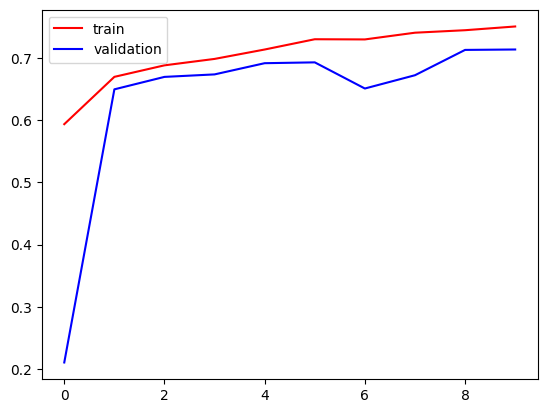

In [75]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

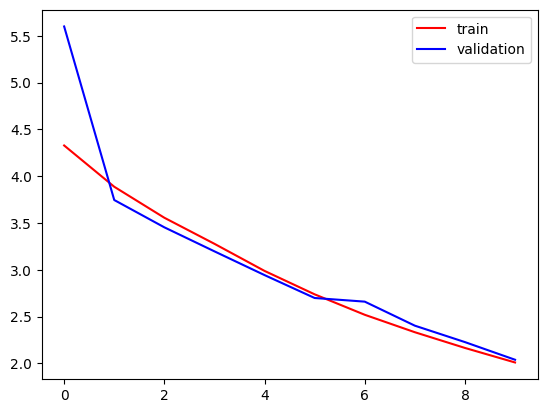

In [76]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [77]:
import cv2
import numpy as np

img_path = "/content/dataset/Landscape Classification/Landscape Classification/Testing Data/Coast/Coast-Test (170).jpeg"
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))


img_array = img / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

class_labels = list(train_set.class_indices.keys())

print("Predicted Class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
Predicted Class: Coast


In [82]:
test_datagen = ImageDataGenerator(rescale = (1./255))

In [83]:
test_set = test_datagen.flow_from_directory(
    '/content/dataset/Landscape Classification/Landscape Classification/Testing Data',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 500 images belonging to 5 classes.


> Achieved 79% accuracy for test dataset

In [84]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7812 - loss: 1.8432

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.7878 - loss: 1.8296
Test Accuracy: 0.79
Test Loss: 1.84
